
            raw_image file : ../DATA/highway/input/in001076.jpg
            gt_image file : ../DATA/highway/groundtruth/gt001076.png

            


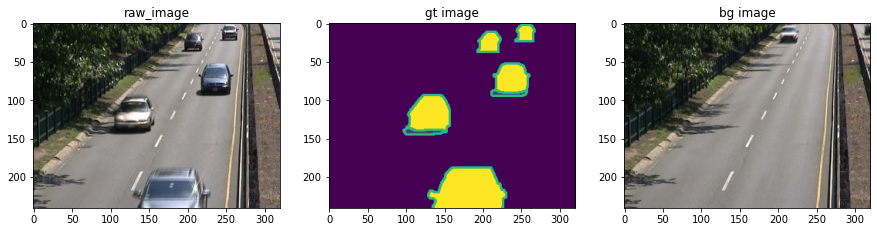


        input hybrid shape : torch.Size([6, 224, 224])
        gt_image shape : torch.Size([224, 224])
        
        
(3, 224, 224) (3, 224, 224)


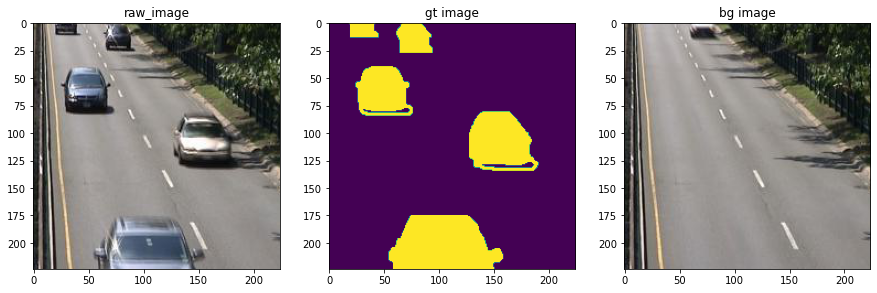


        gt_image unique values : [0. 1.]
    


In [1]:
from skimage import io 
from data import Data
import matplotlib.pyplot as plt 
import numpy as np 

def show(raw, bg, gt ):
    fig, ax = plt.subplots ( nrows = 1, ncols = 3, figsize = (15, 15))
    ax[0].imshow(raw); ax[0].set_title("raw_image")
    ax[1].imshow(gt); ax[1].set_title("gt image")
    ax[2].imshow(bg); ax[2].set_title("bg image")
    plt.show()

# create object 
data = Data(root_dir = "../DATA/", mode = "train")

n = 1 

for i in np.random.choice ( len(data), n ):

    raw_image = io.imread ( data.raw_images[i] )  
    gt_image = io.imread ( data.gt_images[i] )
    bg_image = data.getBgImage(i)  
    print(f'''
            raw_image file : {data.raw_images[i]}
            gt_image file : {data.gt_images[i]}

            ''')
    show ( raw_image, bg_image, gt_image )
    
    input_hybrid, gt_image = data[i]
    print(f'''
        input hybrid shape : { input_hybrid.shape }
        gt_image shape : { gt_image.shape }
        
        ''')

    input_hybrid = input_hybrid.numpy() 
    bg_image, raw_image = input_hybrid[:3], input_hybrid[3:]
    print(bg_image.shape, raw_image.shape )

    bg_image, raw_image = bg_image.transpose((1, 2, 0)), raw_image.transpose((1, 2, 0 ) )
    gt_image = gt_image.squeeze() 
    gt_image = gt_image.numpy() 
    show ( raw_image, bg_image, gt_image) 
    print(f'''
        gt_image unique values : {np.unique(gt_image)}
    ''')


In [2]:
import torch 
import numpy as np 
from torch.utils.data import DataLoader 
from sklearn.model_selection import train_test_split 
from data import Data 

#split into train test
root_dir = "../DATA"
d1, d2 = Data ( root_dir, mode = "train"), Data( root_dir, mode = "test")
train_size = 0.8 
indices = np.arange ( len ( d1 ) ) 
train_indices, test_indices = train_test_split ( indices, train_size = 0.8 )

train_set = torch.utils.data.Subset(d1, train_indices )
test_set = torch.utils.data.Subset (d2, test_indices ) 

print(f'train set size : {len(train_set)}, test_set size : {len(test_set)}')

train_dataloader = DataLoader(  train_set, batch_size = 8, shuffle = True ) 
test_dataloader = DataLoader ( test_set, batch_size = 1, shuffle = False )

train set size : 3527, test_set size : 882


In [3]:
print ( train_set.dataset.mode , test_set.dataset.mode ) 

train test
train test


In [32]:
#----------------
# understanding CDNET dataset
#----------------

# mask output have 5 type of labels . read from here ( http://changedetection.net/ )
# 0 : Static
# 50 : Hard shadow
# 85 : Outside region of interest
# 170 : Unknown motion (usually around moving objects, due to semi-transparency and motion blur)
# 255 : Motion




import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from glob import glob 
import os 
from skimage import io 

cdnet = '../DATA/CDNET/'

# DATA/CDNET/baseline/baseline/highway/groundtruth

input_images = sorted ( glob ( os.path.join ( cdnet, 'baseline/baseline/') + '*/input/*' ) ) 
mask_images = sorted ( glob ( os.path.join ( cdnet, 'baseline/baseline/') + '*/groundtruth/*' ) ) 

roi_images = sorted ( glob ( os.path.join ( cdnet, 'baseline/baseline/') + '*/ROI*' ) )

assert len(input_images) == len(mask_images), "same no. of input and outputs must be"

no of roi images: 8

        file : ../DATA/CDNET/baseline/baseline/PETS2006/ROI.bmp
        roi image shape : (576, 720)
        roi unique values: [255]
        


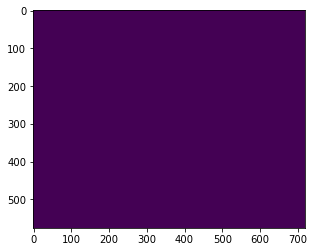


        file : ../DATA/CDNET/baseline/baseline/PETS2006/ROI.jpg
        roi image shape : (576, 720, 3)
        roi unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 

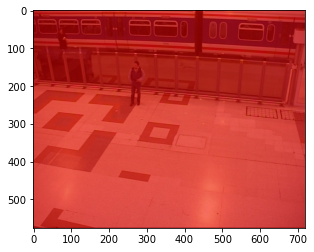


        file : ../DATA/CDNET/baseline/baseline/highway/ROI.bmp
        roi image shape : (240, 320)
        roi unique values: [255]
        


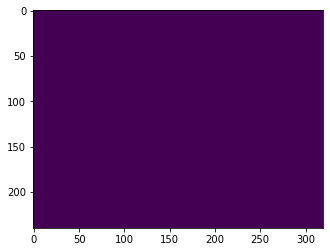


        file : ../DATA/CDNET/baseline/baseline/highway/ROI.jpg
        roi image shape : (240, 320, 3)
        roi unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 2

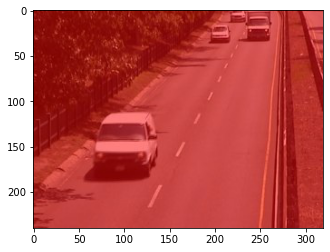


        file : ../DATA/CDNET/baseline/baseline/office/ROI.bmp
        roi image shape : (240, 360)
        roi unique values: [255]
        


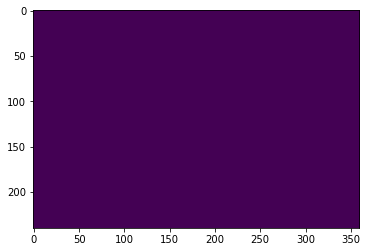


        file : ../DATA/CDNET/baseline/baseline/office/ROI.jpg
        roi image shape : (240, 360, 3)
        roi unique values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 21

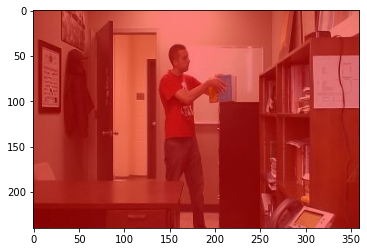


        file : ../DATA/CDNET/baseline/baseline/pedestrians/ROI.bmp
        roi image shape : (240, 360)
        roi unique values: [255]
        


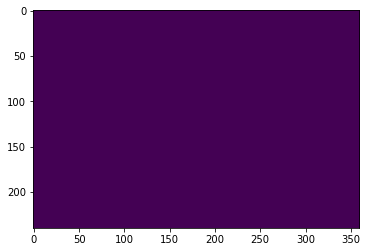


        file : ../DATA/CDNET/baseline/baseline/pedestrians/ROI.jpg
        roi image shape : (240, 360, 3)
        roi unique values: [ 14  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 137 142 145 147 148
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 2

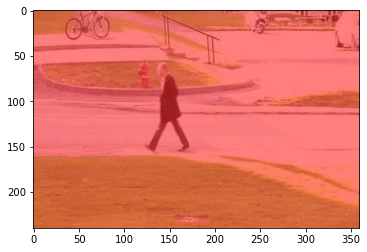

In [34]:
# roi image analysis
print(f"no of roi images: {len(roi_images)}")
for file in roi_images:
    img = io.imread(file)
    print(f'''
        file : {file}
        roi image shape : {img.shape}
        roi unique values: {np.unique(img)}
        ''')
    plt.imshow(img);plt.show()


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000001.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000001.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


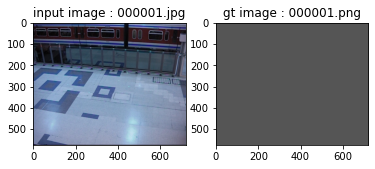


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000002.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000002.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


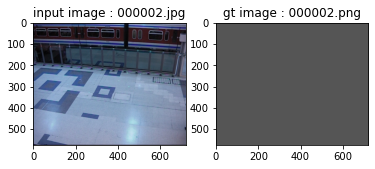


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000003.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000003.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


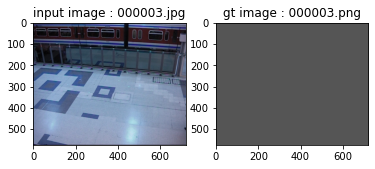


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000004.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000004.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


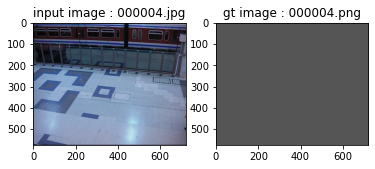


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000005.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000005.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


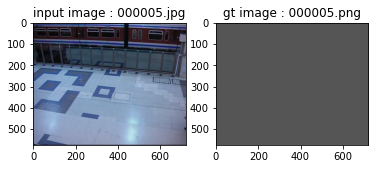


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000006.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000006.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


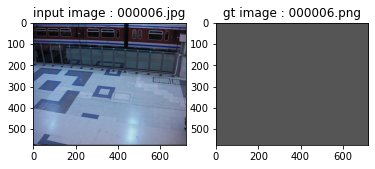


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000007.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000007.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


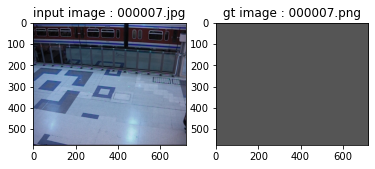


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000008.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000008.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


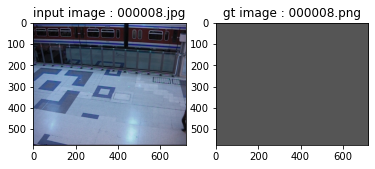


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000009.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000009.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


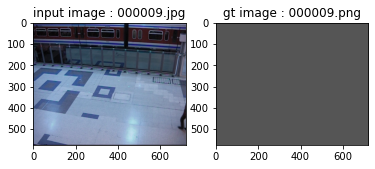


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000010.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000010.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


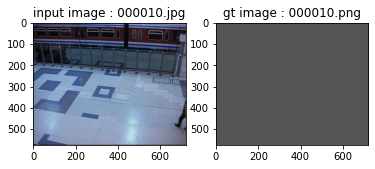


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000011.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000011.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


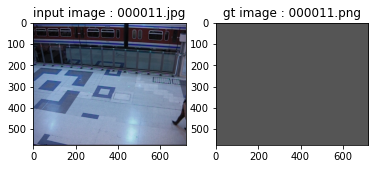


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000012.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000012.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


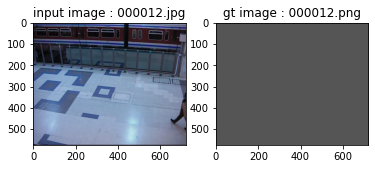


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000013.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000013.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


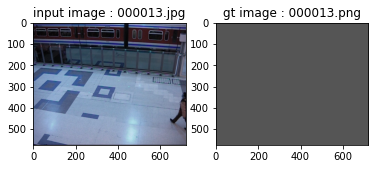


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000014.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000014.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


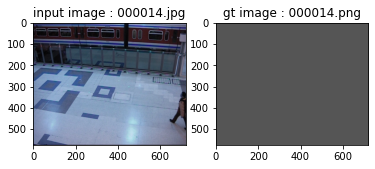


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000015.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000015.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


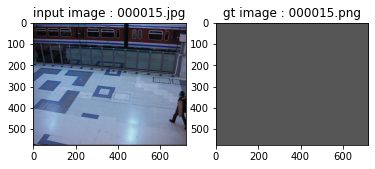


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000016.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000016.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


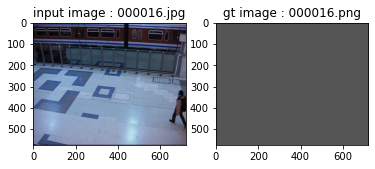


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000017.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000017.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


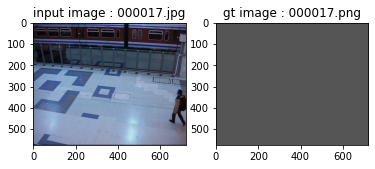


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000018.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000018.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


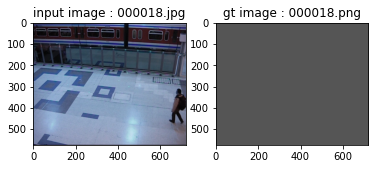


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000019.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000019.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


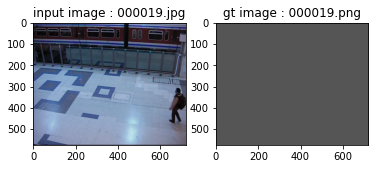


            input image file : ../DATA/CDNET/baseline/baseline/PETS2006/input/in000020.jpg
            output image file : ../DATA/CDNET/baseline/baseline/PETS2006/groundtruth/gt000020.png
            
            input_image shape : (576, 720, 3)
            mask_image shape : (576, 720, 3)
            unique_values in mask_image [85]
           
        


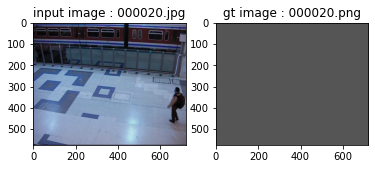

In [37]:
for x in range(10):
    i = np.random.choice(len(input_images))
    # i = x 
    img_in = cv2.imread( input_images[i])
    img_gt = cv2.imread ( mask_images[i])

    print(f'''
            =====================================
            input image file : {input_images[i]}
            output image file : {mask_images[i]}
            
            input_image shape : { img_in.shape }
            mask_image shape : { img_gt.shape }
            unique_values in mask_image { np.unique( img_gt ) }
           
        ''') 

     
    fig, ax = plt.subplots(ncols= 2, nrows = 1) 
    ax[0].imshow(img_in); ax[0].set_title(f'input image : { input_images[i][-10:]}')
    ax[1].imshow(img_gt); ax[1].set_title(f'gt image : {mask_images[i][-10:]}' )
    plt.show()